# Circle Equations

The standard form for the equation of a circle is:

`(x - h)^2 + (y - k)^2 = r^2`

`r` = radius

`(h,k)` = coordinates of the center

In [10]:
from sympy import symbols, Rational, simplify, sqrt

def find_circle_equation(A, B, D, E, F):
    # Define the variables x and y
    x, y = symbols('x y')
    
    # Normalize the coefficients using Rational to avoid floating-point errors
    if A != 1 or B != 1:
        D = Rational(D, A)
        E = Rational(E, B)
        F = Rational(F, A)  # Assume A == B for a circle, otherwise adjust differently
    
    # Completing the square for x
    h = Rational(-D, 2)
    x_term = f"(x + {-h})" if h < 0 else f"(x - {h})"
    
    # Completing the square for y
    k = Rational(-E, 2)
    y_term = f"(y + {-k})" if k < 0 else f"(y - {k})"
    
    # Radius squared
    r_squared = simplify(h**2 + k**2 - F)
    radius = sqrt(r_squared)
    
    # Form the equation in a more intuitive format
    circle_equation = f"{x_term}^2 + {y_term}^2 = {r_squared}"
    
    # Return the equation, center, and radius
    center = (h, k)
    return circle_equation, center, radius


In [11]:
# x^2 + y^2 + 24x + 10y + 160 = 0
A, B, D, E, F = 1, 1, 24, 10, 160
circle_eq, center, radius = find_circle_equation(A, B, D, E, F)

print(f"The equation of the circle is: {circle_eq}")
print(f"The center of the circle is: {center}")
print(f"The radius of the circle is: {radius}")

The equation of the circle is: (x + 12)^2 + (y + 5)^2 = 9
The center of the circle is: (-12, -5)
The radius of the circle is: 3


In [12]:
# 6x^2 + 6y^2 + 12x - 13 = 0
A, B, D, E, F = 6, 6, 12, 0, -13
circle_eq, center, radius = find_circle_equation(A, B, D, E, F)

print(f"The equation of the circle is: {circle_eq}")
print(f"The center of the circle is: {center}")
print(f"The radius of the circle is: {radius}")

The equation of the circle is: (x + 1)^2 + (y - 0)^2 = 19/6
The center of the circle is: (-1, 0)
The radius of the circle is: sqrt(114)/6


In [13]:
# 4x^2 + 4y^2 + 4x - 12y + 1 = 0
A, B, D, E, F = 4, 4, 4, -12, 1
circle_eq, center, radius = find_circle_equation(A, B, D, E, F)

print(f"The equation of the circle is: {circle_eq}")
print(f"The center of the circle is: {center}")
print(f"The radius of the circle is: {radius}")

The equation of the circle is: (x + 1/2)^2 + (y - 3/2)^2 = 9/4
The center of the circle is: (-1/2, 3/2)
The radius of the circle is: 3/2


In [14]:
# x^2 + y^2 - 6y = 5
A, B, D, E, F = 1, 1, 0, -6, -5
circle_eq, center, radius = find_circle_equation(A, B, D, E, F)

print(f"The equation of the circle is: {circle_eq}")
print(f"The center of the circle is: {center}")
print(f"The radius of the circle is: {radius}")


The equation of the circle is: (x - 0)^2 + (y - 3)^2 = 14
The center of the circle is: (0, 3)
The radius of the circle is: sqrt(14)


In [15]:
# x^2 + 10x + y^2 - 4y + 13 = 0
A, B, D, E, F = 1, 1, 10, -4, 13
circle_eq, center, radius = find_circle_equation(A, B, D, E, F)

print(f"The equation of the circle is: {circle_eq}")
print(f"The center of the circle is: {center}")
print(f"The radius of the circle is: {radius}")

The equation of the circle is: (x + 5)^2 + (y - 2)^2 = 16
The center of the circle is: (-5, 2)
The radius of the circle is: 4


## Plotting Circle

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def setup_plot():
    """
    Set up the plot with grid, ticks, and limits.
    """    
    plt.axhline(0, color='black', linewidth=1.0)
    plt.axvline(0, color='black', linewidth=1.0)
    plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    plt.xticks(np.arange(-10, 11, 1))
    plt.yticks(np.arange(-10, 11, 1))
    plt.gca().set_xticks(np.arange(-10, 11, 5), minor=False)
    plt.gca().set_yticks(np.arange(-10, 11, 5), minor=False)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)

In [17]:
from numpy import ndarray
from typing import TypedDict, Optional

class CircleDict(TypedDict):
    h: ndarray[float]
    k: ndarray[float]
    r: ndarray[float]
    color: Optional[str]
    linestyle: Optional[str]
    label: Optional[str]

def plot_circle(circles:list[CircleDict], title:str='Circle Plot'):
    # Generate angles for parametric circle equation
    theta = np.linspace(0, 2 * np.pi, 400)

    # Set aspect ratio to be equal
    plt.gca().set_aspect('equal', adjustable='box')
    
    for circle in circles:
        # Parametric equation of a circle
        x = circle['h'] + circle['r'] * np.cos(theta)
        y = circle['k'] + circle['r'] * np.sin(theta)
        color = circle.get('color', 'blue')
        linestyle = circle.get('linestyle', '-')
        label = circle.get('label', None)
        plt.plot(x, y, color=color, linestyle=linestyle, label=label)
    
    setup_plot()
    plt.xlabel('x')
    plt.ylabel('y', rotation=0)
    plt.title(title)
    
    # Check if any circle has a label and add legend if true
    has_label = any(map(lambda circle: isinstance(circle.get('label'), str), circles))
    if has_label:
        plt.legend()

    # Show plot
    plt.show()


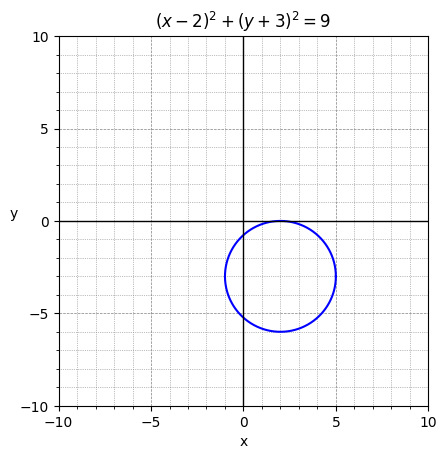

In [18]:
# (x-2)^2 + (y+3)^2 = 9
circles = [{
    'h': 2,
    'k': -3,
    'r': 3,
    'color': 'blue',
    'linestyle': '-',
}]
plot_circle(circles, '$(x-2)^2 + (y+3)^2 = 9$')